# 0. Importing Libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import copy
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import matplotlib.style as style


%matplotlib inline

# 1. Data Visualization and Dealing with missing values

In [78]:
dat_train = pd.read_csv('Data\\aug_train.csv')
dat_test = pd.read_csv('Data\\aug_test.csv')

<AxesSubplot: >

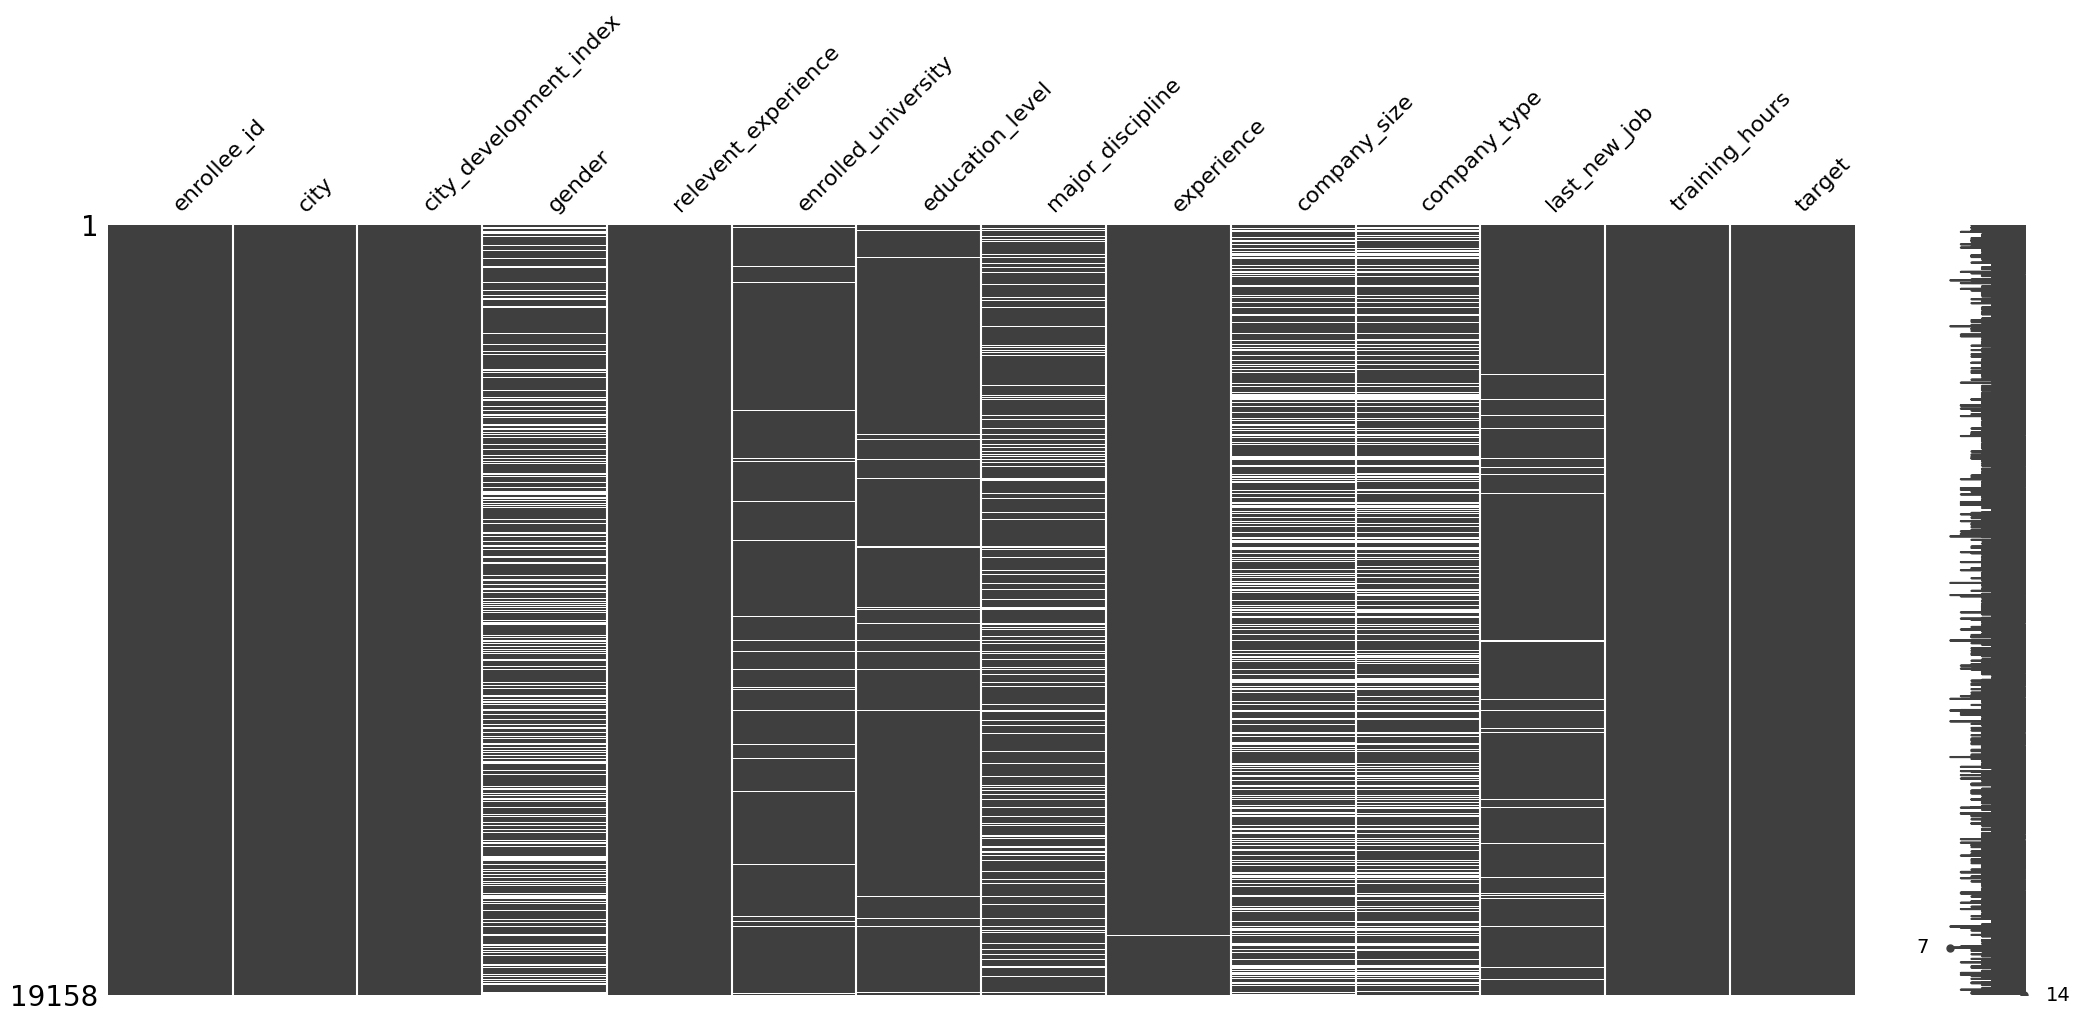

In [66]:
msno.matrix(dat_train)

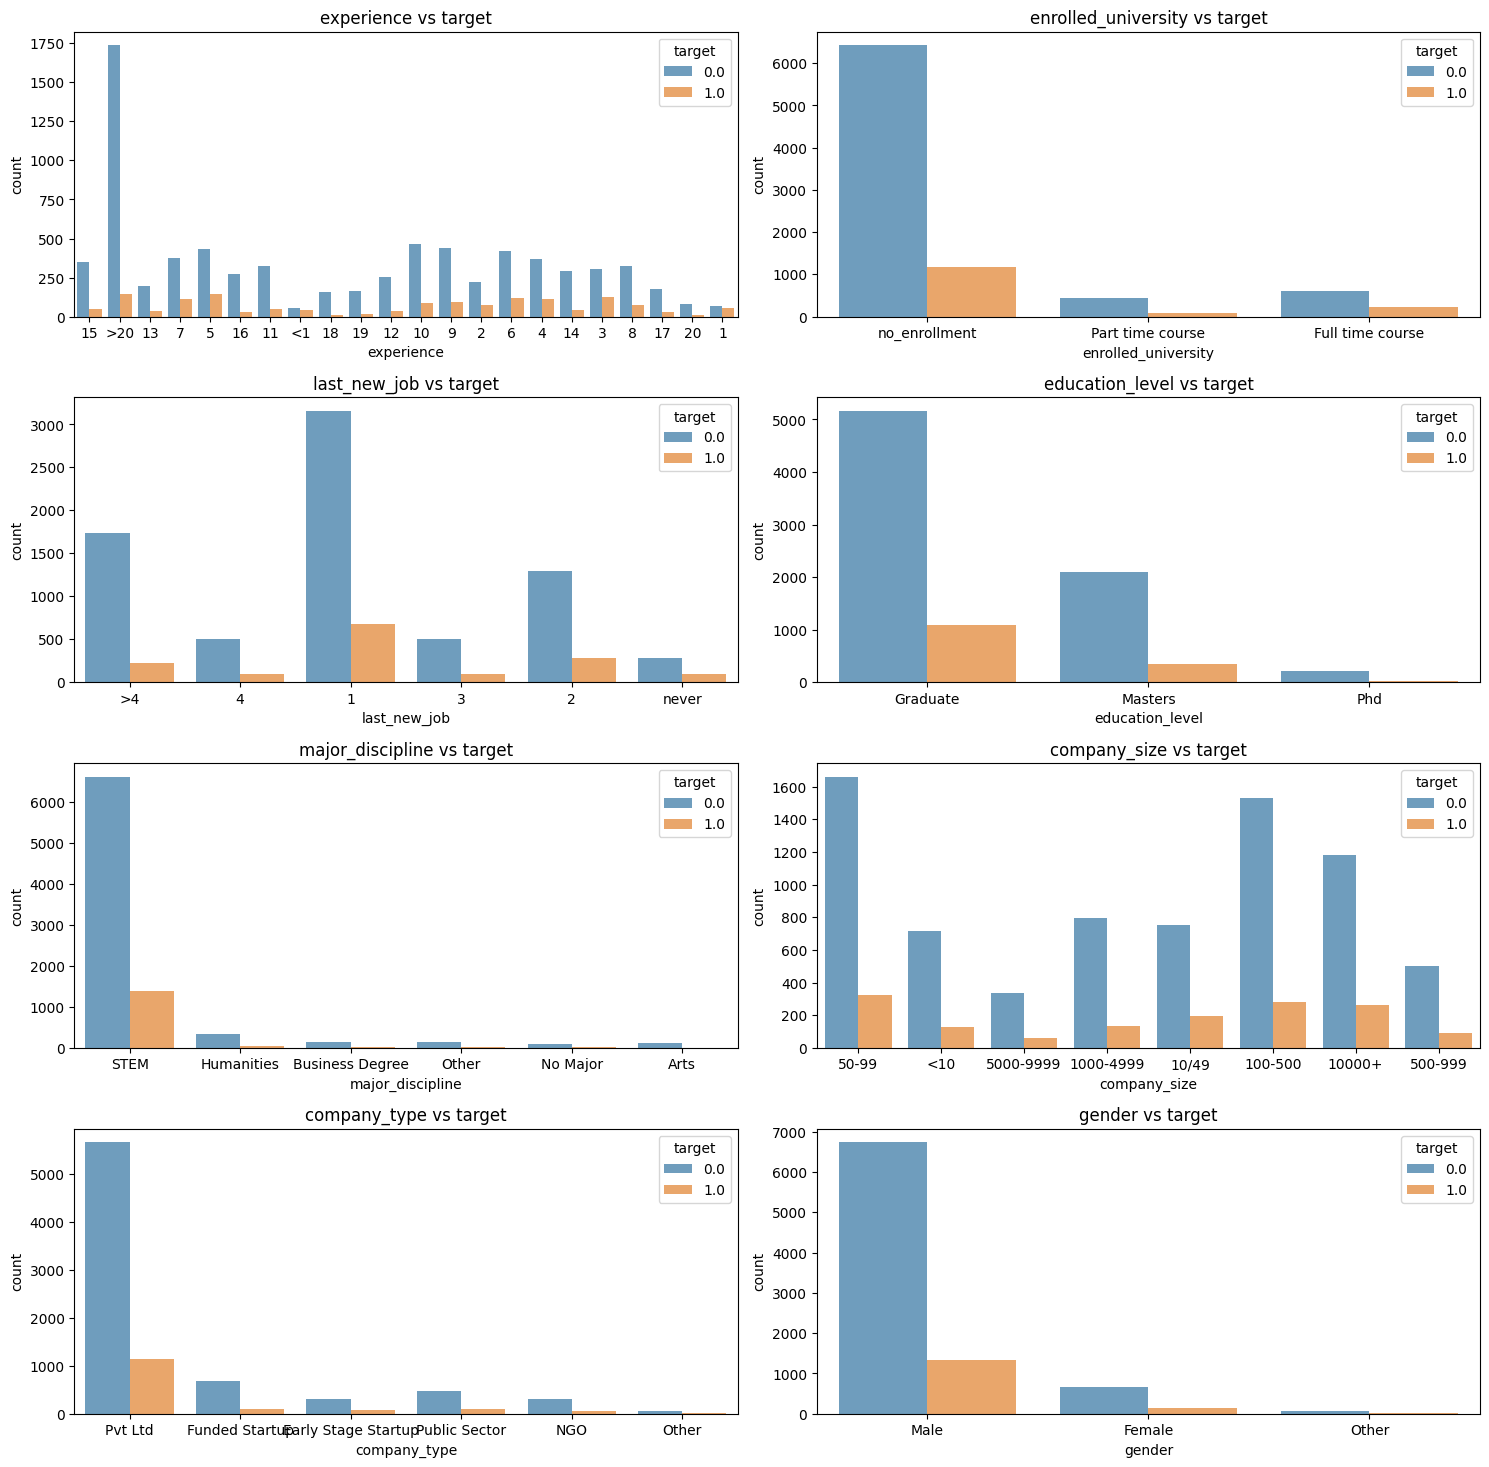

In [76]:
features = [
    "experience", "enrolled_university", "last_new_job", "education_level", "major_discipline", "company_size", "company_type", "gender"
]
count = 0
n = 1

plt.figure(figsize=[15, 18])

for feature in features:
    plt.subplot(5, 2, n)
    sns.countplot(x=feature, hue='target', alpha=0.7, data=dat_train)
    plt.title("{} vs target".format(feature))
    n = n+1
    
    if count < 3:
        dat_train.dropna(subset=[feature], inplace=True)
    else:
        dat_train[feature].fillna(
            method='ffill', limit=3, inplace=True)
        dat_train.dropna(subset=["major_discipline"], inplace=True)

plt.tight_layout()
plt.show()


<AxesSubplot: >

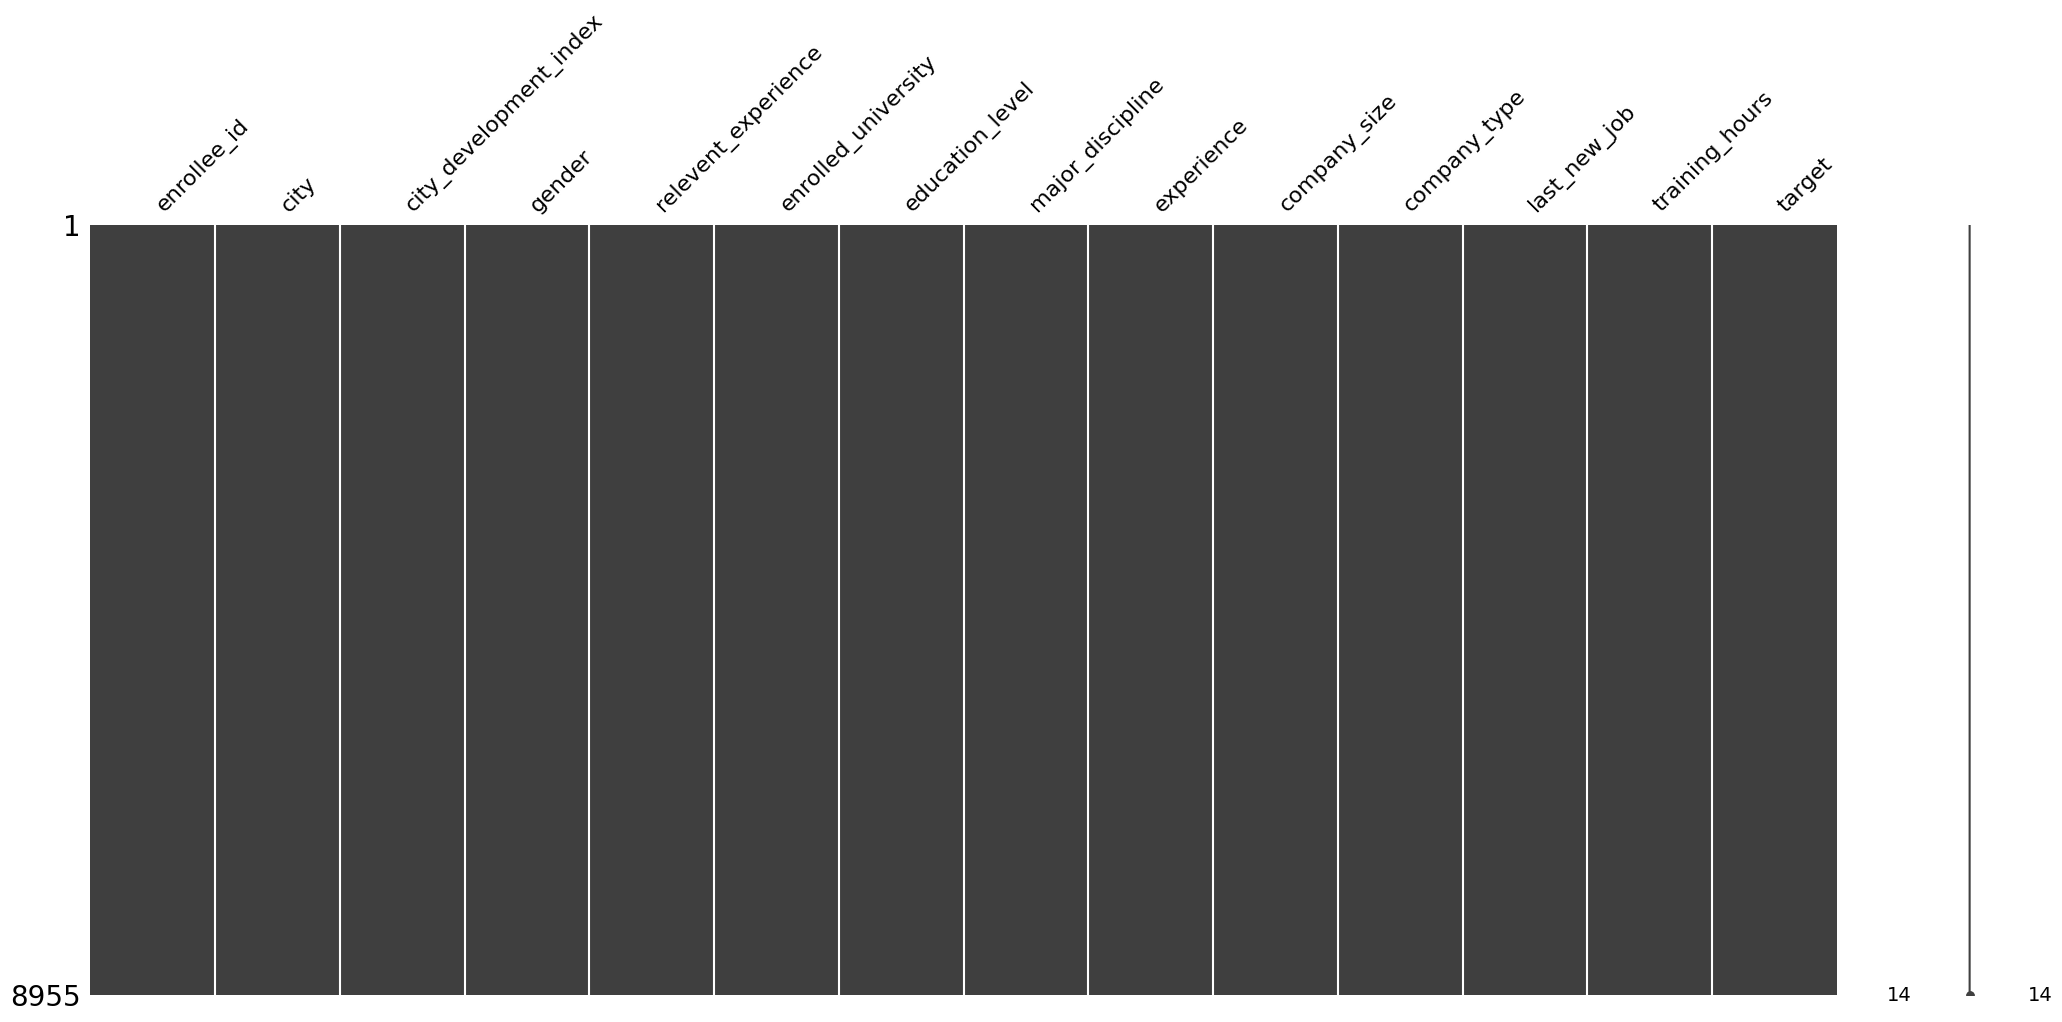

In [73]:
msno.matrix(dat_train)

In [96]:
type(dat_train["target"])


pandas.core.series.Series

In [87]:
x=dat_train.groupby(['target'])['target'].count()
print(x)

target
0.0    14381
1.0     4777
Name: target, dtype: int64


<AxesSubplot: xlabel='target', ylabel='count'>

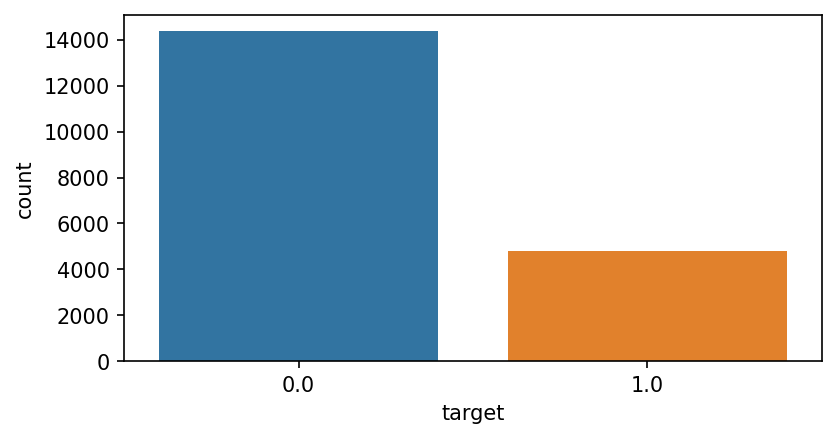

In [86]:
plt.figure(figsize=(6,3),dpi=150)
sns.countplot(data=dat_train,x='target')

# 3. Handling Imbalance in Data